# Titanic - ML based predictor

This is Nipun Jagtap, back with another project on data anlaysis, which is completely based on application of machine learning models to analyse and quintessentially obtain the insights of the received disaster data.
Since this is one of the most heart breaking history of the science and mankind, we will focus on the major impacting factors for all unsurvived people and find the best fitted machine learning model to predict the accurate survival of person.

We will look at conducting the data analysis in this manner:
1. Import data
2. Get the info of data
3. Pre-process the data
4. Apply the Machine Learning models
5. Validate the test data and get the accuracy levels
6. Concluding with the best obtained results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame as df
%matplotlib inline


In [2]:
#import data
train_df = df(pd.read_csv('train.csv'))
test_df = df(pd.read_csv('test.csv'))
GS_df = df(pd.read_csv('gender_submission.csv'))

In [3]:
train_df.info()
#train_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
test_df.info()
#test_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
GS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
dtypes: int64(2)
memory usage: 6.6 KB


In [6]:
# Merge test data and gender submission data

test_df = pd.merge(test_df, GS_df, on = 'PassengerId', how = 'left')
#test_df.info()
print(test_df.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64


In [7]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [8]:
train_df['Age'].fillna(0, inplace = True)
test_df['Age'].fillna(0, inplace = True)

In [9]:
# Extracting the prefix of all the passenger names 

train_df['Title'] = train_df.Name.str.extract('([A-Za-z]+)\.', expand=False)
#train_df[train_df['Age'] < 1].groupby(train_df['Pclass'])['Title'].value_counts()
#train_df['Title']

In [10]:
test_df['Title'] = test_df.Name.str.extract('([A-Za-z]+)\.', expand=False)
#test_df[test_df['Age'] < 1].groupby(test_df['Pclass'])['Title'].value_counts()
#test_df['Title']

In [11]:
# Pre-processing data by removing the 'Null' values from data

# Looking at the above table, we have put condition for the specific passenger class and segregated them to give the mean age designation wise.

# For train dataset

table_train_df = train_df.groupby(['Pclass' , 'Title']).Age.agg(['mean']).reset_index()
table_train_df = table_train_df.rename(columns = {'mean' : 'mean_age'})
table_train_df

,Pclass,Title,mean_age
0,1,Capt,70.000000
1,1,Col,58.000000
2,1,Countess,33.000000
3,1,Don,40.000000
4,1,Dr,35.000000
5,1,Jonkheer,38.000000
6,1,Lady,48.000000
7,1,Major,48.500000
8,1,Master,5.306667
9,1,Miss,29.347826


In [12]:
# Similarly for test dataset

table_test_df = test_df.groupby(['Pclass' , 'Title']).Age.agg(['mean']).reset_index()
table_test_df = table_test_df.rename(columns = {'mean' : 'mean_age'})
table_test_df

,Pclass,Title,mean_age
0,1,Col,50.000000
1,1,Dona,39.000000
2,1,Dr,53.000000
3,1,Master,9.500000
4,1,Miss,31.428571
5,1,Mr,35.653846
6,1,Mrs,43.000000
7,2,Master,5.000000
8,2,Miss,17.370000
9,2,Mr,29.567797


In [13]:
train_df[train_df.Age == 0].shape

(177, 13)

In [14]:
# Removing nulls from train dataset

train_df = pd.merge(train_df ,table_train_df, left_on= ['Title' , 'Pclass'] , right_on= ['Title','Pclass'] , how = 'left')
train_df['Age'] = np.where(train_df['Age'] == 0 , train_df.mean_age , train_df.Age)
column_of_interest = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title']
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,mean_age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Mr,20.620690
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs,33.095238
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,10.906863
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Mrs,33.095238
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Mr,20.620690
5,6,0,3,"Moran, Mr. James",male,20.620690,0,0,330877,8.4583,NaN,Q,Mr,20.620690
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,Mr,33.808411
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,Master,4.586429
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,Mrs,26.333333
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C,Mrs,33.682927


In [15]:
train_df[train_df['Age'] == 0].shape

(0, 14)

In [16]:
x = test_df[test_df['Pclass'] == 3]
y = x[x['Age'] == 0]
y = y[y['Title'] == 'Ms']
y['PassengerId']

88    980
Name: PassengerId, dtype: int64

In [17]:
test_df = test_df[test_df.PassengerId != 980]
test_df = test_df[test_df.Fare != 0]
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,Mrs


In [18]:
# Removing nulls from test dataset

test_df = pd.merge(test_df ,table_test_df, left_on= ['Title' , 'Pclass'] , right_on= ['Title','Pclass'] , how = 'left')
test_df['Age'] = np.where(test_df['Age'] == 0 , test_df.mean_age , test_df.Age)

In [19]:
test_df[column_of_interest].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null object
mean_age       891 non-null float64
dtypes: float64(3), int64(5), object(6)
memory usage: 104.4+ KB


In [21]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415 entries, 0 to 414
Data columns (total 14 columns):
PassengerId    415 non-null int64
Pclass         415 non-null int64
Name           415 non-null object
Sex            415 non-null object
Age            415 non-null float64
SibSp          415 non-null int64
Parch          415 non-null int64
Ticket         415 non-null object
Fare           414 non-null float64
Cabin          90 non-null object
Embarked       415 non-null object
Survived       415 non-null int64
Title          415 non-null object
mean_age       415 non-null float64
dtypes: float64(3), int64(5), object(6)
memory usage: 48.6+ KB


## **Relating and finding the impactful factors for the survival of people**

### 1) Corelating with Age Group

In [22]:
bins = [-2, 0, 3, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Kids', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train_df['AgeGroup'] = pd.cut(train_df["Age"], bins, labels = labels)
test_df['AgeGroup'] = pd.cut(test_df["Age"], bins, labels = labels)
q = (train_df[train_df['Survived'] == 1].AgeGroup.value_counts())
q

Young Adult    111
Adult           78
Student         57
Kids            41
Teenager        30
Baby            20
Senior           5
Unknown          0
Name: AgeGroup, dtype: int64

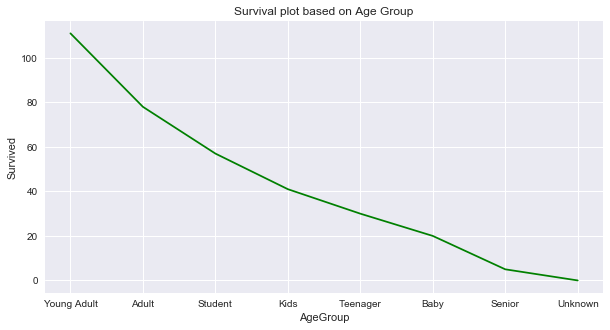

In [23]:
fig, ax = plt.subplots(1, figsize = (10,5))
ax.plot(np.arange(len(labels)), q[0:8], color = 'green')
plt.xticks(np.arange(len(labels)), q.index.values)
plt.ylabel('Survived')
plt.xlabel('AgeGroup')
plt.title('Survival plot based on Age Group')
plt.show()

### 2) Corelating with Passenger Class


In [24]:
pclass_srv = train_df[train_df['Survived'] ==1].groupby(train_df['Pclass'])['Survived'].sum()
pclass_srv

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

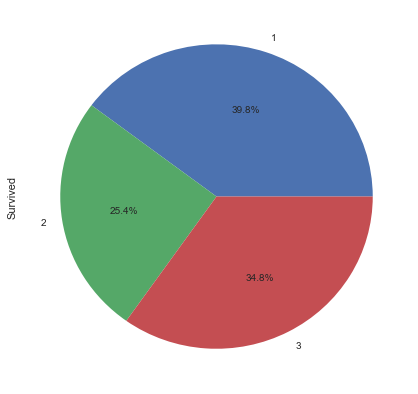

In [25]:
# Visualisation of above data

c = pclass_srv.iloc[0:3]
plt.figure(1, figsize=(7,7))
c.plot.pie(autopct="%1.1f%%")
plt.show()

### 3) Finding the survival's ticket fare

In [26]:
Surv_avgfare = train_df.groupby(train_df['Survived'])['Fare'].aggregate(['min', 'mean', 'max'])
Surv_avgfare

,min,mean,max
Survived,,,
0,0.0,22.117887,263.0000
1,0.0,48.395408,512.3292


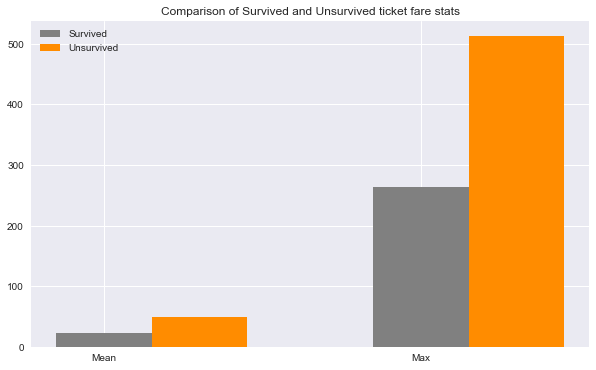

In [27]:
#Visualisation

surv_df = Surv_avgfare.iloc[0, 1:]
unsurv_df = Surv_avgfare.iloc[1, 1:]
fig, ax = plt.subplots(1, figsize = (10, 6))
x = np.arange(2)
width = 0.3
var = ['Mean', 'Max']

a = ax.bar(x, surv_df, width, color = 'grey')
b = ax.bar(x+width, unsurv_df, width, color = 'darkorange')
plt.xticks(x, var)
plt.title('Comparison of Survived and Unsurvived ticket fare stats')
plt.legend((a[0], b[0]), ('Survived', 'Unsurvived'))
plt.show()

### 4) Finding the corelation with the number of siblings or spouse

In [28]:
Sibsp = train_df.groupby('SibSp')['Survived'].sum()
#Sibsp.tail(8)

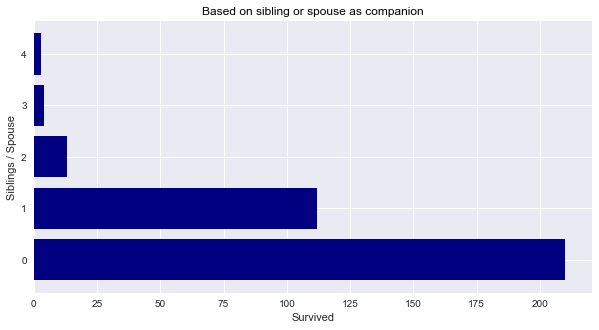

In [29]:
fig, ax = plt.subplots(1, figsize=(10, 5))
n_SibSp = ['0', '1', '2', '3', '4']
ax.barh(np.arange(len(n_SibSp)), Sibsp[0:5], color = 'navy') 
plt.yticks(np.arange(len(n_SibSp)), n_SibSp)
plt.xlabel('Survived')
plt.ylabel('Siblings / Spouse')
plt.title('Based on sibling or spouse as companion', color = 'Black')
plt.show()

# Applying machine learning models on the following dataset 

In [30]:
#Cut the data to important columns

train = train_df.drop(['Name', 'Parch', 'Ticket', 'Embarked', 'Cabin', 'Title', 'AgeGroup', 'mean_age'], axis = 1)
test = test_df.drop(['Name', 'Parch', 'Ticket', 'Embarked', 'Cabin', 'AgeGroup', 'mean_age', 'Title'], axis = 1)

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 7 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Fare           891 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 95.7+ KB


In [32]:
test['Fare'].fillna(0, inplace = True)
test = test[test.PassengerId != 1044]

In [33]:
# Setting the variables 

train_X = train.iloc[:, 2:7].values
train_Y = train.iloc[:, 1].values

test_X = test.iloc[:, 1:6].values
test_Y = test.iloc[:, 6].values

## Pre-processing the data

Since no categorical variable is allowed in the variable set of the machine learning model, lets convert the 'Sex' variable into numerical variable.

Also, the numerical values are need to be scaled accoding to the other values.


In [34]:
# Encoding Independent variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
train_X[:, 1] = labelencoder_X.fit_transform(train_X[:, 1])
test_X[:, 1] = labelencoder_X.fit_transform(test_X[:, 1])


In [35]:
# Scaling of variables
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
train_X = sc_X.fit_transform(train_X)
test_X = sc_X.transform(test_X)
sc_y = StandardScaler()

C:\Users\Toma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


## Applying the Linear Regression Model

### Theory:

Confusion Matrix - Its a Performance Measurment Matrix

Sensitivity - True Positive rate (TP / (TP + FN))

Specificity - True Negative rate (TN / (TN + FP))

Precision - Out of all the positive classes we have predicted correctly, how many are True positive. (TP / (FP + TP))

t - False Positive rate (1 - Sensitivity)

In [36]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(train_X, train_Y)

#Predicting the Test set results
pred_Y0 = np.round(regressor.predict(test_X))

In [37]:
from sklearn.metrics import confusion_matrix
cm_0 = confusion_matrix(test_Y, pred_Y0)
cm_0

array([[257,   6],
       [  6, 145]])

In [38]:
#ROC calculations
sens_0 = cm_0[1, 1]/(cm_0[1, 1] + cm_0[1, 0])
spec_0 = cm_0[0, 0]/(cm_0[0, 0] + cm_0[0, 1])
precs_0 = cm_0[1, 1]/(cm_0[1, 1] + cm_0[0, 1])
t_0 = 1-spec_0

print('In Linear regression','--->', 'Sensitivity=', round(sens_0, 3), 'Specificity=', round(spec_0, 3), 
      'Precision=', round(precs_0, 3) )



In Linear regression ---> Sensitivity= 0.96 Specificity= 0.977 Precision= 0.96


In [39]:
# Accuracy
A = (cm_0[0, 0] + cm_0[1, 1])*100/414
A

97.101449275362313

### 1) Multiple regression model

In [40]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(train_X, train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
#Building the optimal model using Backward Elimination method

import statsmodels.formula.api as sm
X = np.append(arr = train_X, values = np.ones((891,1)).astype(int), axis = 1)
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
regressor_OLS = sm.OLS(endog = train_Y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     116.1
Date:                Mon, 13 Apr 2020   Prob (F-statistic):           1.96e-94
Time:                        12:34:47   Log-Likelihood:                -397.20
No. Observations:                 891   AIC:                             806.4
Df Residuals:                     885   BIC:                             835.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1556      0.017     -9.134      0.000      -0.189      -0.122
x2            -0.2389      0.013    -18.202      0.000      -0.265      -0.213
x3            -0.0838      0.015     -5.682      0.000      -0.113      -0.055
x4            -0.0565      0.014     -4.173      0.000      -0.083      -0.030
x5             0.0162      0.016      1.023      0.306      -0.015       0.047
const          0.3838      0.013     30.217      0.000       0.359       0.409
==============================================================================
Omnibus:                       37.386   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.132
Skew:                           0.523   Prob(JB):                     1.17e-09
Kurtosis:                       3.125   Cond. No.                         2.25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# Removing  x5 from the X_Opt set
X_opt = X[:, [0, 1, 2, 3, 5]]
regressor_OLS = sm.OLS(endog = train_Y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     144.9
Date:                Mon, 13 Apr 2020   Prob (F-statistic):           2.57e-95
Time:                        12:34:47   Log-Likelihood:                -397.73
No. Observations:                 891   AIC:                             805.5
Df Residuals:                     886   BIC:                             829.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1650      0.014    -11.498      0.000      -0.193      -0.137
x2            -0.2401      0.013    -18.381      0.000      -0.266      -0.215
x3            -0.0848      0.015     -5.762      0.000      -0.114      -0.056
x4            -0.0536      0.013     -4.048      0.000      -0.080      -0.028
const          0.3838      0.013     30.216      0.000       0.359       0.409
==============================================================================
Omnibus:                       36.963   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.607
Skew:                           0.519   Prob(JB):                     1.52e-09
Kurtosis:                       3.126   Cond. No.                         1.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# Predicting the test results

#From the above regression, it can be concluded that the result of survival is majorly dependent on the variables like 
#'Pclass', 'Sex', 'Age', 'Siblings/spouse'. Because, the 'P' value is below significance level (0.05)

x = np.append(arr = test_X, values = np.ones((414,1)).astype(int), axis = 1)
test_X1 = x[:, [0, 1, 2, 3, 5]]

pred_Y1 = np.round(regressor.predict(test_X1))

In [44]:
# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm_1 = confusion_matrix(test_Y, pred_Y1)
cm_1
#ROC calculations
sens_1 = cm_1[1, 1]/(cm_1[1, 1] + cm_1[1, 0])
spec_1 = cm_1[0, 0]/(cm_1[0, 0] + cm_1[0, 1])
precs_1 = cm_1[1, 1]/(cm_1[1, 1] + cm_1[0, 1])
t_1 = 1-spec_1

print('In Multiple regression','--->', 'Sensitivity=', round(sens_1, 3), 'Specificity=', round(spec_1, 3), 
      'Precision=', round(precs_1, 3) )



In Multiple regression ---> Sensitivity= 0.967 Specificity= 0.981 Precision= 0.967


In [45]:
# Accuracy
A_1 = (cm_1[0, 0] + cm_1[1, 1]) *100/414
A_1

97.584541062801932

## 2) Logistic Regression Model

In [46]:
# Fitting logistics regression to training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(train_X, train_Y)

# Predicting test results
pred_Y2 = classifier.predict(test_X)

# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm_2 = confusion_matrix(test_Y, pred_Y2)

#ROC calculations
sens_2 = cm_2[1, 1]/(cm_2[1, 1] + cm_2[1, 0])
spec_2 = cm_2[0, 0]/(cm_2[0, 0] + cm_2[0, 1])
precs_2 = cm_2[1, 1]/(cm_2[1, 1] + cm_2[0, 1])
t_2 = 1-spec_2


print('In Logistic Regression','--->', 'Sensitivity=', round(sens_2, 3), 'Specificity=', round(spec_2, 3), 
      'Precision=', round(precs_2, 3) )



In Logistic Regression ---> Sensitivity= 0.927 Specificity= 0.947 Precision= 0.909


In [47]:
# Accuracy
A_2 = (cm_2[0, 0] + cm_2[1, 1])*100/414
A_2

93.961352657004838

## 3) SVR classification model 

In [48]:

# Fitting Support Vector Regression to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(train_X, train_Y)

# Predicting the Test set results
pred_Y3 = classifier.predict(test_X)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_3 = confusion_matrix(test_Y, pred_Y3)


#ROC calculations
sens_3 = cm_3[1, 1]/(cm_3[1, 1] + cm_3[1, 0])
spec_3 = cm_3[0, 0]/(cm_3[0, 0] + cm_3[0, 1])
precs_3 = cm_3[1, 1]/(cm_3[1, 1] + cm_3[0, 1])
t_3 = 1-spec_3

print('In Logistic Regression','--->', 'Sensitivity=', round(sens_3, 3), 'Specificity=', round(spec_3, 3), 
      'Precision=', round(precs_3, 3) )


In Logistic Regression ---> Sensitivity= 0.848 Specificity= 0.958 Precision= 0.921


In [49]:
# Accuracy
A_3 = (cm_0[0, 0] + cm_0[1, 1])*100/414
A_3

97.101449275362313

## 4) Naive Bayes classification model

In [50]:
# Fitting classifier to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(train_X, train_Y)

# Predicting the Test set results
pred_Y4 = classifier.predict(test_X)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_4 = confusion_matrix(test_Y, pred_Y4)

#ROC calculations
sens_4 = cm_4[1, 1]/(cm_4[1, 1] + cm_4[1, 0])
spec_4 = cm_4[0, 0]/(cm_4[0, 0] + cm_4[0, 1])
precs_4 = cm_4[1, 1]/(cm_4[1, 1] + cm_4[0, 1])
t_4 = 1-spec_4

print('In Logistic Regression','--->', 'Sensitivity=', round(sens_4, 3), 'Specificity=', round(spec_4, 3), 
      'Precision=', round(precs_4, 3) )


In Logistic Regression ---> Sensitivity= 0.967 Specificity= 0.909 Precision= 0.859


In [51]:
# Accuracy
A_4 = (cm_4[0, 0] + cm_4[1, 1])*100/414
A_4

92.995169082125599

## 5) Random Forest classification model


In [52]:
# Fitting Random forest classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(train_X, train_Y)

# Predicting the Test set results
pred_Y5 = classifier.predict(test_X)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_5 = confusion_matrix(test_Y, pred_Y5)

#ROC calculations
sens_5 = cm_5[1, 1]/(cm_5[1, 1] + cm_5[1, 0])
spec_5 = cm_5[0, 0]/(cm_5[0, 0] + cm_5[0, 1])
precs_5 = cm_5[1, 1]/(cm_5[1, 1] + cm_5[0, 1])
t_5 = 1-spec_5

print('Random Forest classification','--->', 'Sensitivity=', round(sens_5, 3), 'Specificity=', round(spec_5, 3), 
      'Precision=', round(precs_5, 3) )


Random Forest classification ---> Sensitivity= 0.742 Specificity= 0.871 Precision= 0.767


In [53]:
# Accuracy
A_5 = (cm_5[0, 0] + cm_5[1, 1]) *100/414
A_5

82.367149758454104

## Inference

As 'Age' being the one of the key variables in the entire data analysis, we have tried to fill in most appropriate age for all the inconsistencies.

From the basic exploratory data analysis (EDA), we found few keys points:
1. Young Adults and Adults take the majority of survived people
2. Unsurprisingly, First class pubic are majorly saved. 
3. People with no family responsibilities (like spouse, siblings) are found to have mostly survived.

From the above data analysis, using the novel and unique machine learning models, we have performed rigorous calculation. From this, it can be observed that 'Multiple Regression Model' is found to be the best fitting model for the given data, both precision wise and accuracy wise. 

Unexpectedly, the results of the 'Random Forest Classifier' model is found to have least accurate and precised too.

Though the data was much cleaner, the test and train data set were already provided separated. This could be the possible justification of the incompetible results of the other models.

Though Receiver Operating Characteristic (ROC) is usually found in the case of logistic regression to represent the characteristic of data graphically, we have tried to calculate all the parameters for various models to understand its behaviour. 